In [38]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
synthetic = pd.read_csv("clean_data.csv")
sa1 = gpd.read_file("sa1_to_poa.gpkg")
poa = gpd.read_file("poa_selected.gpkg")
poa_vehs = pd.read_csv("poa_ev.csv")

In [21]:
sa1_poa = sa1[["SA1_CODE21", "POA_CODE21"]]
synthetic["SA1"] = synthetic["SA1"].astype(str)
synthetic_merged = sa1_poa.merge(synthetic, left_on="SA1_CODE21", right_on="SA1", how="right")

synthetic_merged['house_id'] = range(1, len(synthetic_merged) + 1)
synthetic_merged["score"] = 0
synthetic_merged["count"] = 1

synthetic_merged = synthetic_merged.dropna().drop(columns="SA1")

In [36]:
hhsize_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
vehs_bins = [-1, 0, 1, 2, 3, 4, 5]
synthetic_merged["INC_bins"] = pd.cut(synthetic_merged["INC"], bins=10)
synthetic_merged["HHSIZE_bins"] = pd.cut(synthetic_merged["HHSIZE"], bins=hhsize_bins)
synthetic_merged["TOTALVEHS_bins"] = pd.cut(synthetic_merged["TOTALVEHS"], bins=vehs_bins)
df = synthetic_merged.drop(columns=["HHSIZE", "TOTALVEHS", "INC", "HHSIZE_normalised", "TOTALVEHS_normalised", "INC_normalised"])
df = pd.get_dummies(df, columns=['INC_bins'], prefix='INC')
df = pd.get_dummies(df, columns=['HHSIZE_bins'], prefix='HHSIZE')
df = pd.get_dummies(df, columns=['TOTALVEHS_bins'], prefix='TOTALVEHS')
df = df.groupby("POA_CODE21").sum().reset_index()
df["POA_CODE21"] = df["POA_CODE21"].astype(str)
poa_vehs["POA_CODE21"] = poa_vehs["POA_CODE21"].astype(str)
df = df.merge(poa_vehs, on="POA_CODE21", how="inner")
df

C:\Users\danla\AppData\Local\Temp\ipykernel_11304\221532170.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby("POA_CODE21").sum().reset_index()


,POA_CODE21,dwelltype_Flat or Apartment,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,house_id,score,...,"HHSIZE_(7, 8]","HHSIZE_(8, 9]","HHSIZE_(9, 10]","TOTALVEHS_(-1, 0]","TOTALVEHS_(0, 1]","TOTALVEHS_(1, 2]","TOTALVEHS_(2, 3]","TOTALVEHS_(3, 4]","TOTALVEHS_(4, 5]",TOTAL1
0,3000,3900,14069,2388,5232,5281,9654,190,4760725298,0,...,3,2,6,2377,10625,5739,1206,316,94,62.0
1,3002,386,1535,240,550,566,1017,28,461916611,0,...,1,1,4,242,1072,653,142,38,14,29.0
2,3003,684,2511,427,967,972,1647,36,948711957,0,...,1,1,3,398,1723,1132,256,86,27,25.0
3,3004,1058,3615,596,1331,1422,2465,51,1405912121,0,...,0,2,2,574,2736,1525,312,93,29,26.0
4,3006,2038,7710,1265,2841,2857,5197,118,2819394078,0,...,0,0,0,1157,5522,3428,685,178,43,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,3977,4460,26483,3536,12241,8447,13502,289,45493242943,0,...,336,351,750,1864,11099,13910,4435,2027,1144,29.0
281,3978,1524,9670,1295,4739,2977,4685,88,15836386985,0,...,112,132,268,543,3743,5286,1792,749,376,26.0
282,3980,171,866,105,395,285,452,10,1437384919,0,...,10,9,15,77,396,445,127,65,32,2.0
283,3981,266,1289,211,567,462,719,18,2069275467,0,...,7,14,30,129,660,641,196,92,48,4.0


### Spearman

,Attribute,Correlation,P-Value
0,"HHSIZE_(0, 1]",0.358419,4.590170e-10
1,"TOTALVEHS_(-1, 0]",0.319745,3.394536e-08
2,"TOTALVEHS_(0, 1]",0.283104,1.185272e-06
3,dwelltype_Terrace/Townhouse,0.218487,2.013689e-04
4,dwelltype_Flat or Apartment,0.188035,1.427946e-03
5,owndwell_Fully Owned,0.170169,3.961541e-03
6,owndwell_Being Rented,0.116481,4.947530e-02
7,"INC_(3600.0, 4200.0]",0.082620,1.642121e-01
8,"INC_(4800.0, 5400.0]",0.072621,2.216297e-01
9,"INC_(-6.0, 600.0]",0.062772,2.909234e-01


<Figure size 2500x2000 with 0 Axes>

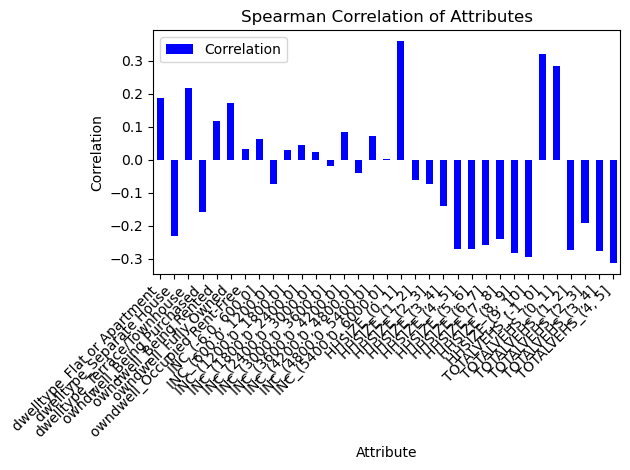

In [49]:
target_column = "TOTAL1"

# Calculate Pearson correlation coefficients and p-values
correlation_with_target = {}
for column in df.drop(columns=["POA_CODE21", "score", "count", "house_id", "TOTAL1"]).columns:
    if column != target_column:
        correlation, p_value = stats.spearmanr((df[column]/ df["count"]), df[target_column])
        correlation_with_target[column] = (correlation, p_value)

# Convert the correlation dictionary to a DataFrame
correlation_df = pd.DataFrame.from_dict(correlation_with_target, orient="index", columns=["Correlation", "P-Value"])
correlation_df = correlation_df.reset_index().rename(columns={'index': 'Attribute'})
#correlation_df = correlation_df.sort_values("Correlation", ascending=False).reset_index(drop=True)
display(correlation_df.sort_values("Correlation", ascending=False).reset_index(drop=True))

plt.figure(figsize=(25, 20))  # Adjust the figsize as needed
correlation_df.plot.bar(x="Attribute", y="Correlation", color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.title('Spearman Correlation of Attributes')
plt.tight_layout()
plt.show()

correlation_df.to_csv('spearman_corr.csv', index=False)

,Attribute,Correlation,P-Value
0,"HHSIZE_(0, 1]",0.354640,7.177029e-10
1,"TOTALVEHS_(-1, 0]",0.320757,3.055674e-08
2,"TOTALVEHS_(0, 1]",0.256749,1.137811e-05
3,dwelltype_Terrace/Townhouse,0.185802,1.630527e-03
4,dwelltype_Flat or Apartment,0.185158,1.693688e-03
5,owndwell_Fully Owned,0.139643,1.834148e-02
6,"INC_(3600.0, 4200.0]",0.072879,2.199839e-01
7,owndwell_Being Rented,0.062184,2.954775e-01
8,"INC_(1200.0, 1800.0]",0.054455,3.596965e-01
9,"INC_(4800.0, 5400.0]",0.044227,4.570488e-01


<Figure size 2500x2000 with 0 Axes>

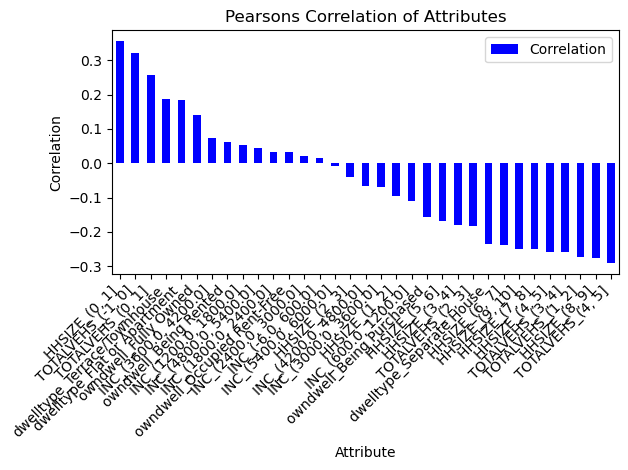

In [41]:
target_column = "TOTAL1"

# Calculate Pearson correlation coefficients and p-values
correlation_with_target = {}
for column in df.drop(columns=["POA_CODE21", "score", "count", "house_id", "TOTAL1"]).columns:
    if column != target_column:
        correlation, p_value = stats.pearsonr((df[column]/ df["count"]), df[target_column])
        correlation_with_target[column] = (correlation, p_value)

# Convert the correlation dictionary to a DataFrame
correlation_df = pd.DataFrame.from_dict(correlation_with_target, orient="index", columns=["Correlation", "P-Value"])
correlation_df = correlation_df.reset_index().rename(columns={'index': 'Attribute'})
correlation_df = correlation_df.sort_values("Correlation", ascending=False).reset_index(drop=True)
display(correlation_df)

plt.figure(figsize=(25, 20))  # Adjust the figsize as needed
correlation_df.plot.bar(x="Attribute", y="Correlation", color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.title('Pearsons Correlation of Attributes')
plt.tight_layout()
plt.show()

,index,TOTAL1
22,"HHSIZE_(5, 6]",0.508616
2,dwelltype_Terrace/Townhouse,0.420484
8,"INC_(600.0, 1200.0]",0.336939
4,owndwell_Being Rented,0.332265
26,"HHSIZE_(9, 10]",0.305252
31,"TOTALVEHS_(3, 4]",0.248056
23,"HHSIZE_(6, 7]",0.182780
11,"INC_(2400.0, 3000.0]",0.181879
25,"HHSIZE_(8, 9]",0.166945
3,owndwell_Being Purchased,0.159034


<Figure size 2500x2000 with 0 Axes>

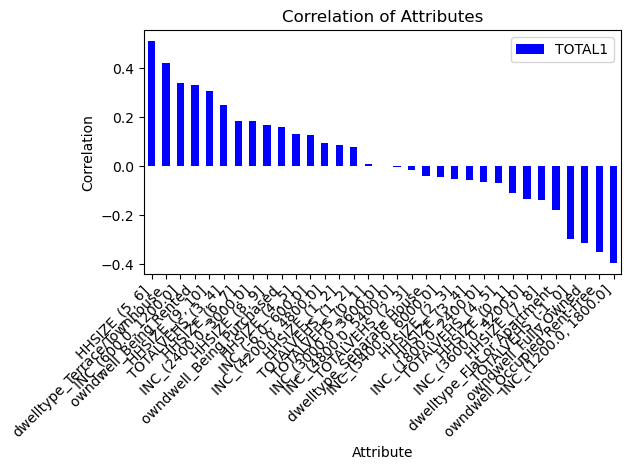

In [44]:
df_corr = df.drop(columns=["POA_CODE21", "score", "count", "house_id"])
df_corr_normalized = df_corr.div(df["count"], axis=0)  
correlations = df_corr_normalized.corr()["TOTAL1"].drop("TOTAL1")
correlations = correlations.reset_index().sort_values("TOTAL1", ascending=False)
display(correlations)

plt.figure(figsize=(25, 20))  # Adjust the figsize as needed
correlations.plot.bar(x="index", y="TOTAL1", color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.title('Correlation of Attributes')
plt.tight_layout()
plt.show()